# Overturning and barotropic circulation in FOCI-OpenIFS-AGRIF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cmocean 

In [59]:
# Read grid
grid = '/sfs/fs1/work-geomar/smomw352/foci_analysis/grids_areas_masks.nc'
ds_grid = xr.open_dataset(grid)
orca05_x   = ds_grid['opat.lon'].shape[1]
orca05_y   = ds_grid['opat.lon'].shape[0]

orca05_lon = xr.DataArray(ds_grid['opat.lon'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})
orca05_lat = xr.DataArray(ds_grid['opat.lat'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})
orca05_area = xr.DataArray(ds_grid['opat.srf'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})
orca05_mask = xr.DataArray(ds_grid['opat.srf'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})

## AMOC

In [38]:
var = 'zomsfatl'

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_MOC_yseasmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
moc_foci_lr = ds_foci_lr[var].groupby('time_counter.season').mean('time_counter').squeeze()

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_MOC_yseasmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
moc_foci_lr_nest = ds_foci_lr_nest[var].groupby('time_counter.season').mean('time_counter').squeeze()

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_MOC_yseasmean.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
moc_foci_hr_nest = ds_foci_hr_nest[var].groupby('time_counter.season').mean('time_counter').squeeze()

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_MOC_yseasmean.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
moc_foci_hr = ds_foci_hr[var].groupby('time_counter.season').mean('time_counter').squeeze()

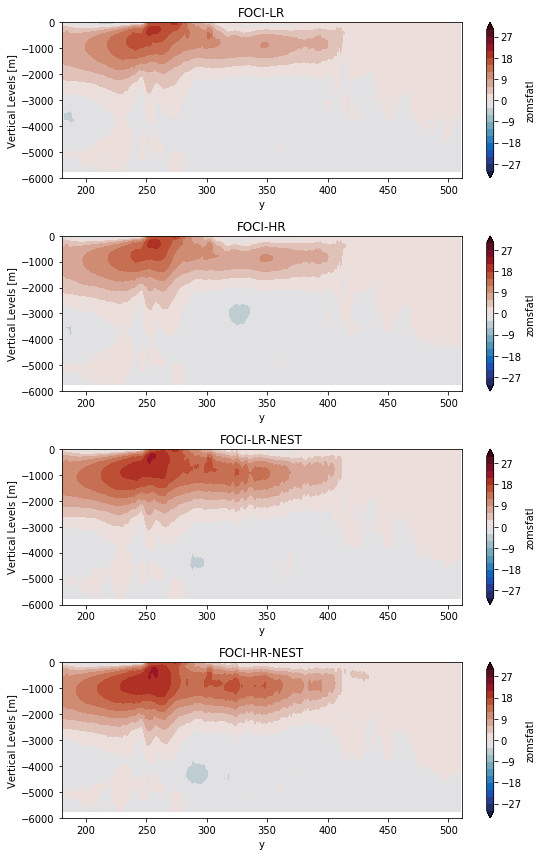

In [56]:
fig, axes = plt.subplots(4,1,figsize=(8,12))
axs = axes.flat

levels = np.linspace(-30,30,21)
cmap   = cmocean.cm.balance
season = 'DJF'
moc_foci_lr.sel(season=season).plot.contourf(ax=axs[0],levels=levels,cmap=cmap)
moc_foci_hr.sel(season=season).plot.contourf(ax=axs[1],levels=levels,cmap=cmap)
moc_foci_lr_nest.sel(season=season).plot.contourf(ax=axs[2],levels=levels,cmap=cmap)
moc_foci_hr_nest.sel(season=season).plot.contourf(ax=axs[3],levels=levels,cmap=cmap)
axs[0].set_title('FOCI-LR')
axs[1].set_title('FOCI-HR')
axs[2].set_title('FOCI-LR-NEST')
axs[3].set_title('FOCI-HR-NEST')

for ax in axs:
    ax.set_xlim([180,511])
    ax.set_ylim([-6000,0])

fig.tight_layout()
fig.savefig('amoc.png',format='png')

## AMOC trend

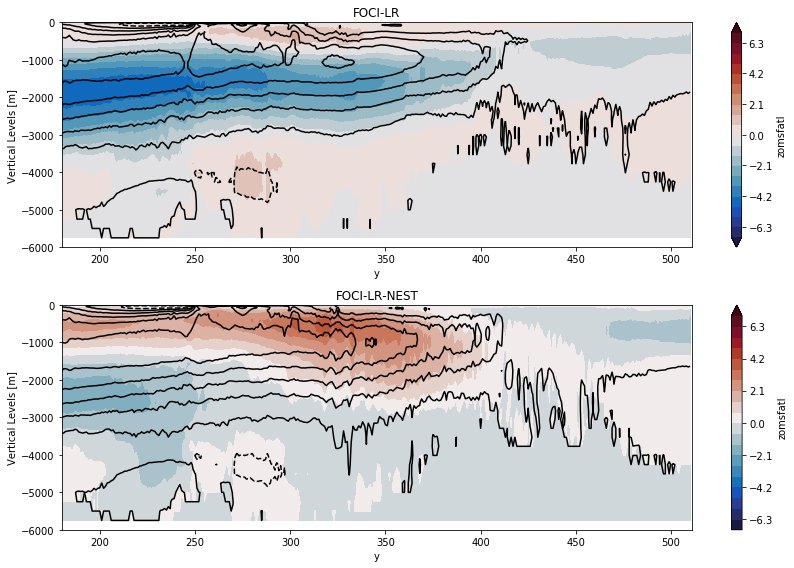

In [54]:
var = 'zomsfatl'

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19000101_20791231_MOC_yearmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
diff_moc_foci_lr = ds_foci_lr[var].sel(time_counter=slice('1960-01-01','1990-01-01')).mean('time_counter') - ds_foci_lr[var].sel(time_counter=slice('1900-01-01','1930-01-01')).mean('time_counter')
mean_moc_foci_lr = ds_foci_lr[var].sel(time_counter=slice('1900-01-01','1930-01-01')).mean('time_counter')

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19000101_19911231_MOC_yearmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
diff_moc_foci_lr_nest = ds_foci_lr_nest[var].sel(time_counter=slice('1960-01-01','1990-01-01')).mean('time_counter') - ds_foci_lr_nest[var].sel(time_counter=slice('1900-01-01','1930-01-01')).mean('time_counter')
mean_moc_foci_lr_nest = ds_foci_lr_nest[var].sel(time_counter=slice('1900-01-01','1930-01-01')).mean('time_counter')

fig, axes = plt.subplots(2,1,figsize=(12,8))
axs = axes.flat

dlevels = np.linspace(-7,7,21)
levels = np.linspace(-30,30,21)
cmap   = cmocean.cm.balance

season = 'DJF'
diff_moc_foci_lr.squeeze().plot.contourf(ax=axs[0],levels=dlevels,cmap=cmap)
mean_moc_foci_lr.squeeze().plot.contour(ax=axs[0],colors='k',levels=levels)
diff_moc_foci_lr_nest.squeeze().plot.contourf(ax=axs[1],levels=dlevels,cmap=cmap)
mean_moc_foci_lr_nest.squeeze().plot.contour(ax=axs[1],colors='k',levels=levels)
axs[0].set_title('FOCI-LR')
axs[1].set_title('FOCI-LR-NEST')

for ax in axs:
    ax.set_xlim([180,511])
    ax.set_ylim([-6000,0])

fig.tight_layout()
fig.savefig('amoc_trend.png',format='png')

## AMOC (sigma coord)

In [104]:
var = 'zomsfatl'

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_MOCSIG_yseasmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
sig_foci_lr = ds_foci_lr[var].groupby('time_counter.season').mean('time_counter').squeeze()
print(sig_foci_lr)

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_MOCSIG_yseasmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
sig_foci_lr_nest = ds_foci_lr_nest[var].groupby('time_counter.season').mean('time_counter').squeeze()

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_MOCSIG_yseasmean.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
sig_foci_hr_nest = ds_foci_hr_nest[var].groupby('time_counter.season').mean('time_counter').squeeze()

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_MOCSIG_yseasmean.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
sig_foci_hr = ds_foci_hr[var].groupby('time_counter.season').mean('time_counter').squeeze()

<xarray.DataArray 'zomsfatl' (season: 4, sigma: 52, y: 511)>
array([[[ 0.0000000e+00, -1.8832296e-05, -4.3508284e-05, ...,
          9.4071084e-01,  9.4010109e-01,  0.0000000e+00],
        [ 0.0000000e+00, -1.8832296e-05, -4.3508284e-05, ...,
          9.4981110e-01,  9.5434707e-01,  0.0000000e+00],
        [ 0.0000000e+00, -1.8832296e-05, -4.3508284e-05, ...,
          9.5143324e-01,  9.5744616e-01,  0.0000000e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          4.8765677e-01,  4.8302677e-01,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 0.0000000e+00,  6.8333215e-06,  1.6014728e-05, ...,
          1.8182307e+00,  1.8161523e+00,  0.0000000e+00],
        [ 0.0000000e+00,  6.8333215e-06,  1.6014728e-05, ...,
          1.7378654e+0

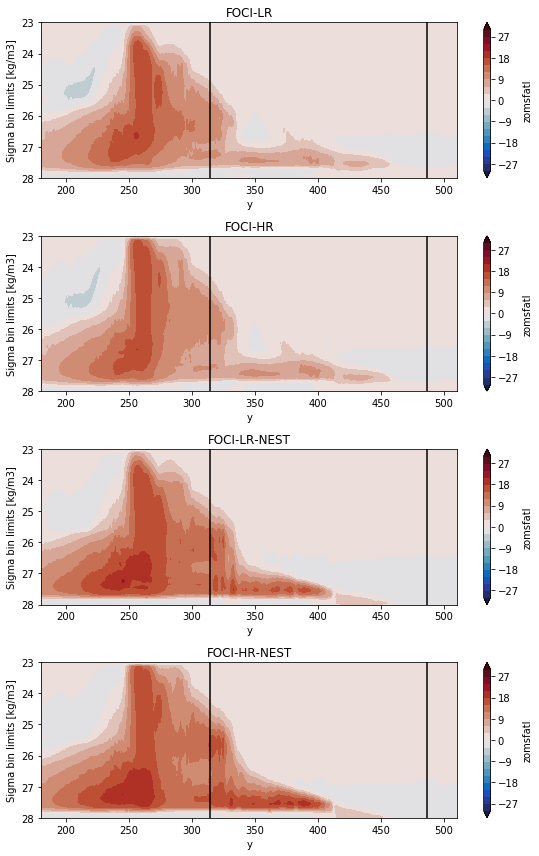

In [113]:
fig, axes = plt.subplots(4,1,figsize=(8,12))
axs = axes.flat

levels = np.linspace(-30,30,21)
cmap   = cmocean.cm.balance
season = 'DJF'
sig_foci_lr.sel(season=season).plot.contourf(x='y',y='sigma',ax=axs[0],levels=levels,cmap=cmap)
sig_foci_hr.sel(season=season).plot.contourf(x='y',y='sigma',ax=axs[1],levels=levels,cmap=cmap)
sig_foci_lr_nest.sel(season=season).plot.contourf(x='y',y='sigma',ax=axs[2],levels=levels,cmap=cmap)
sig_foci_hr_nest.sel(season=season).plot.contourf(x='y',y='sigma',ax=axs[3],levels=levels,cmap=cmap)
axs[0].set_title('FOCI-LR')
axs[1].set_title('FOCI-HR')
axs[2].set_title('FOCI-LR-NEST')
axs[3].set_title('FOCI-HR-NEST')

for ax in axs:
    ax.set_xlim([180,511])
    ax.set_ylim([23,28])
    ax.invert_yaxis()
    # Mark the AGRIF nest
    ax.axvline(x=314,color='k')
    ax.axvline(x=487,color='k')

fig.tight_layout()
fig.savefig('amoc_sigma.png',format='png')

## Barotropic circulation

In [86]:
var = 'sobarstf'
scale = 1e-6

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_PSI_yseasmean_r360x180.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
bsf_foci_lr = ds_foci_lr[var].groupby('time_counter.season').mean('time_counter').squeeze() * scale

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_PSI_yseasmean_r360x180.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
bsf_foci_lr_nest = ds_foci_lr_nest[var].groupby('time_counter.season').mean('time_counter').squeeze() * scale

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_PSI_yseasmean_r360x180.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
bsf_foci_hr_nest = ds_foci_hr_nest[var].groupby('time_counter.season').mean('time_counter').squeeze() * scale

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_PSI_yseasmean_r360x180.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
bsf_foci_hr = ds_foci_hr[var].groupby('time_counter.season').mean('time_counter').squeeze() * scale


/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


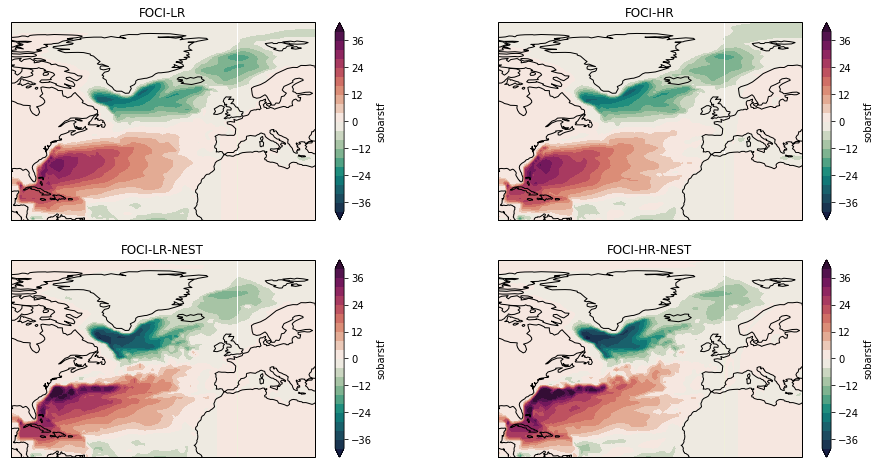

In [88]:
prj = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,8))
axs = []
axs.append( fig.add_subplot(2,2,1,projection=prj) )
axs.append( fig.add_subplot(2,2,2,projection=prj) )
axs.append( fig.add_subplot(2,2,3,projection=prj) )
axs.append( fig.add_subplot(2,2,4,projection=prj) )

levels = np.linspace(-40,40,21)
cmap = cmocean.cm.curl

bsf_foci_lr.sel(season='DJF').plot.contourf(ax=axs[0],levels=levels,cmap=cmap,extend='both')
bsf_foci_hr.sel(season='DJF').plot.contourf(ax=axs[1],levels=levels,cmap=cmap,extend='both')
bsf_foci_lr_nest.sel(season='DJF').plot.contourf(ax=axs[2],levels=levels,cmap=cmap,extend='both')
bsf_foci_hr_nest.sel(season='DJF').plot.contourf(ax=axs[3],levels=levels,cmap=cmap,extend='both')

axs[0].set_title('FOCI-LR')
axs[1].set_title('FOCI-HR')
axs[2].set_title('FOCI-LR-NEST')
axs[3].set_title('FOCI-HR-NEST')

for ax in axs:
    ax.coastlines()
    ax.set_extent([-90,30,10,88],crs=prj)
    ax.add_feature(cartopy.feature.LAND)

fig.savefig('bsf_mean.png',format='png',dpi=300)